##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test :", x_test.shape,  "y_test :", y_test.shape)

# Number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train: (60000, 28, 28) y_train: (60000,)
x_test : (10000, 28, 28) y_test : (10000,)
Number of classes: 10


In [2]:
# Define class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


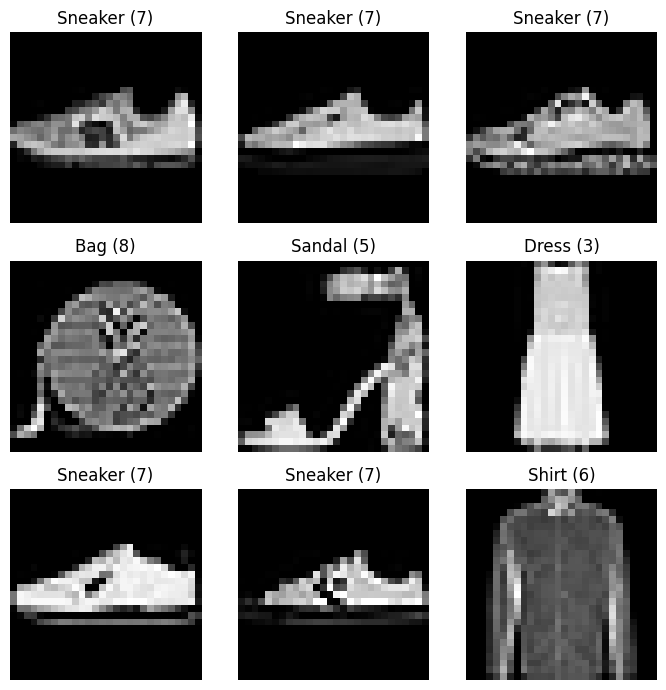

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(7,7))

indices = np.random.choice(len(x_train), 9, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(f"{class_names[y_train[idx]]} ({y_train[idx]})")
    plt.axis("off")

plt.tight_layout()
plt.show()


0 - T-shirt/top: 6000
1 - Trouser: 6000
2 - Pullover: 6000
3 - Dress: 6000
4 - Coat: 6000
5 - Sandal: 6000
6 - Shirt: 6000
7 - Sneaker: 6000
8 - Bag: 6000
9 - Ankle boot: 6000


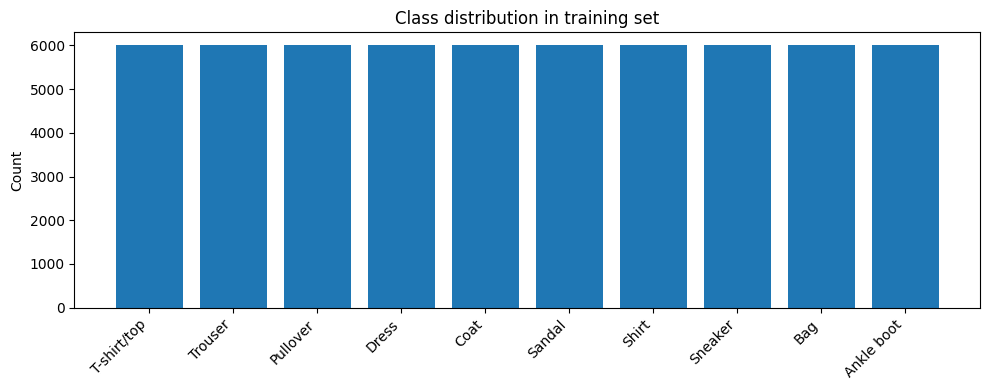

In [4]:
# Count occurrences of each class in the training set
counts = np.bincount(y_train, minlength=10)

for i, c in enumerate(counts):
    print(f"{i} - {class_names[i]}: {c}")

# Plot the class distribution
plt.figure(figsize=(10,4))
plt.bar(range(10), counts)
plt.xticks(range(10), class_names, rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Class distribution in training set")
plt.tight_layout()
plt.show()


### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [5]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize pixel values for x_train and x_test
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm  = x_test.astype("float32") / 255.0

# Add channel dimension: (28,28) -> (28,28,1)
x_train_norm = np.expand_dims(x_train_norm, -1)
x_test_norm  = np.expand_dims(x_test_norm, -1)

print("Normalized shapes:", x_train_norm.shape, x_test_norm.shape)

# One-hot encode the labels
# DO NOT one-hot encode (keep labels as integers) because we will use sparse_categorical_crossentropy.

# Build a CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.summary()

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    x_train_norm, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Normalized shapes: (60000, 28, 28, 1) (10000, 28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8115 - loss: 0.5187 - val_accuracy: 0.8735 - val_loss: 0.3278
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8807 - loss: 0.3259 - val_accuracy: 0.8873 - val_loss: 0.2958
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8993 - loss: 0.2763 - val_accuracy: 0.9043 - val_loss: 0.2619
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9103 - loss: 0.2473 - val_accuracy: 0.9120 - val_loss: 0.2355
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9189 - loss: 0.2205 - val_accuracy: 0.9075 - val_loss: 0.2430
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9252 - loss: 0.2036 - val_accuracy: 0.9087 - val_loss: 0.2478
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9320 - loss: 0.1843 - val_accuracy: 0.9180 - val_loss: 0.2250
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9383 - loss: 0.1673 - 

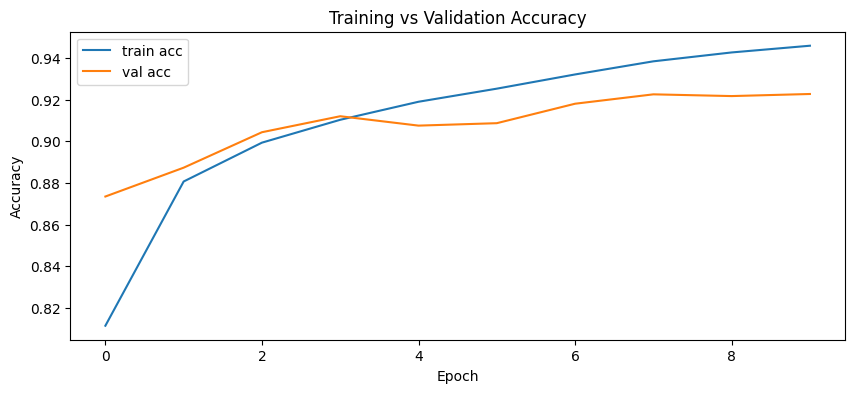

In [6]:
plt.figure(figsize=(10,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
